# Two-dimensional array and gradient problem
In machine learning, it is important to find the minimum value of a function. The gradient descent method is used for this purpose.


In this assignment, we will consider the gradient of a function using NumPy to aid in understanding the gradient descent method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## [Problem 1] Linear function
$y = \frac{1}{2}x + 1$

$x$ in range -50 to 50

In [2]:
x = np.arange(-50.0, 50.1, 0.1)
y = np.array(0.5*x+1)
print('Array of x: {}'.format(x))
print('Array of y: {}'.format(y))

Array of x: [-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
Array of y: [-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


## [Problem 2] Array combination
Combine the ndarrays created in Problem 1 into an array of the form (1001, 2). Make sure x is in the 0th column and y is in the 1st column.

In [3]:
def array_combination(arr_1, arr_2):
    combined = np.concatenate(([arr_1.T], [arr_2.T]))
    return combined.T

test = array_combination(x, y)
print('Combined array with x and y is:\n{}'.format(test))

Combined array with x and y is:
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


# [Problem 3] Find the gradient
$gradient = \frac{amount\ of\ change\ in\ y}{amount\ of\ change\ in\ x}$

In [4]:
def find_gradient(arr):
    x, y = arr.T
    change_x = x[1:] - x[:-1]
    change_y = y[1:] - y[:-1]
    gradient = change_y / change_x
    return gradient

np.shape(find_gradient(test))

(1000,)

# [Problem 4] Draw a graph
Draw a graph of the linear function using Matplotlib. Also, draw a graph with x on the horizontal axis and gradient on the vertical axis.

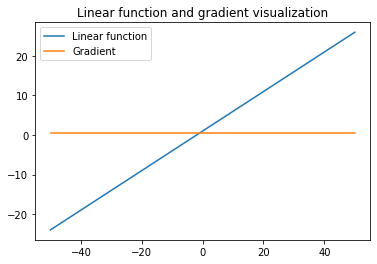

In [5]:
def visualization(gradient):
    plt.title('Linear function and gradient visualization')
    plt.plot(gradient.T[0], gradient.T[1],label='Linear function')
    plt.plot(gradient.T[0][1:], find_gradient(gradient), label='Gradient')
    plt.legend()
    plt.show()
    
visualization(test)

## [Problem 5] Python functionalization
Calculate the gradient of the following three equations at 0.1 intervals and output it with ndarray.

* $y = x^2\ (-50 \leq x \leq 50)$

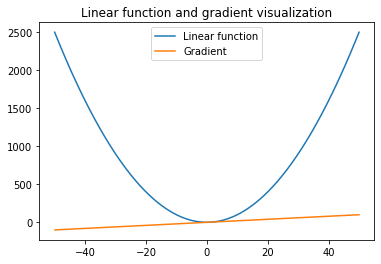

In [20]:
x = np.arange(-50.0, 50.1, 0.1)
y = np.array(x**2)
combined_array1 = array_combination(x, y)
visualization(combined_array1)

* $y = 2x^2 + 2^x\ (-50 \leq x \leq 50)$

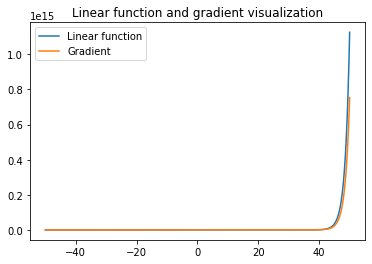

In [23]:
x = np.arange(-50.0, 50.1, 0.1)
y = np.array(2*(x**2) + 2**x)
combined_array2 = array_combination(x, y)
visualization(combined_array2)

* $y = sin(x^{\frac{1}{2}})\ (0 \leq x \leq 50)$

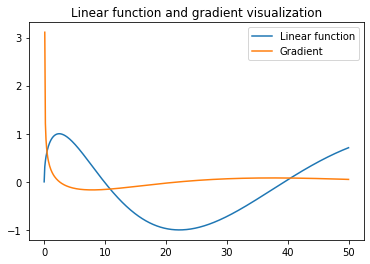

In [24]:
x = np.arange(0.0, 50.1, 0.1)
y = np.array(np.sin(x**0.5))
combined_array3 = array_combination(x, y)
visualization(combined_array3)

## [Problem 6] Find the minimum value
Use the ndarray min method and argmin method instead of the gradient descent method. The min method can get the minimum value, and the argmin method can get the index of the minimum value.

In [43]:
def find_min(arr):
    x, y = arr.T
    min_value = np.min(y)
    min_value_index = np.argmin(y, axis=0)
    return min_value, min_value_index

def display_res(combined_array):
    func = find_min(combined_array)
    print('Minimum value of the function: {}'.format(func[0]))
    print('Index of minimum value of the function: {}'.format(func[1]))
    print('Slope before min: {}'.format(find_gradient(combined_array[func[1]-1:func[1]+1])))
    print([func[1]-1:func[1]+1])
    
    print('Slope after min: {}'.format(find_gradient(combined_array[func[1]:func[1]+2])))
    print()
    
display_res(combined_array1)
display_res(combined_array2)
display_res(combined_array3)

Minimum value of the function: 5.048709793414476e-25
Index of minimum value of the function: 500
Slope before min: [-0.1]
Slope after min: [0.1]

Minimum value of the function: 0.9505505632959851
Index of minimum value of the function: 498
Slope before min: [-0.41701833]
Slope after min: [0.02482428]

Minimum value of the function: -0.9999997540298113
Index of minimum value of the function: 222
Slope before min: [-0.00063884]
Slope after min: [0.00048745]

